<a href="https://colab.research.google.com/github/SampannaMishra/Online-Retail-Customer-Segmentation/blob/main/Online_retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the dataset
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone project/Copy of Online Retail.xlsx')

In [ ]:
# finding the shape of the data
data.shape

(541909, 8)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# simmary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## **Data Preprocessing**

Remove the row entries containing the cancelling orders or invoices

Remove the rows/columns containing the null or missing values

Remove duplicates

Convert the CustomerID values to integer (from float) followed by categorical values.

Deleting the negative values from the Quantity column of dataset

In [ ]:
# invoiceID with suffix is considered a cancelled order. Removing those columns before procedding with further analysis
import re
data = data[~(data['InvoiceNo'].str.contains('C', flags = re.IGNORECASE, regex = True,na=False))]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# checking for null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

In [ ]:
# CudtomerID has many null values and this firld cannot be imputed by any imputing metholology.So only way left is dropping the null values. 
data.dropna(inplace = True)

print(f"\nAfter Dropping the customerID null rows:\nNumber of rows= {data.shape[0]}")


After Dropping the customerID null rows:
Number of rows= 397924


In [ ]:
# dropping duplicate values
data.drop_duplicates(inplace = True)
print(f"\nAfter Dropping Duplicates:\nNumber of rows = {data.shape[0]}")


After Dropping Duplicates:
Number of rows = 392732


In [ ]:
# converting the customerID to category datatype
data['CustomerID'] = data['CustomerID'].astype('int64').astype('category')
data['CustomerID'].dtype

CategoricalDtype(categories=[12346, 12347, 12348, 12349, 12350, 12352, 12353, 12354,
                  12355, 12356,
                  ...
                  18273, 18274, 18276, 18277, 18278, 18280, 18281, 18282,
                  18283, 18287],
, ordered=False)

In [ ]:
# Quantity column had negative values so deleting the negative values from the dataset
data = data[data['Quantity']>=0]

In [ ]:
data.describe()

,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


## **Exploratory Data Analysis**

In [ ]:
# creating a copy of processed data
df = data.copy()

In [ ]:
# Grouping countries by TotalAmount of sales

country_price = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4254037
Netherlands              200937
EIRE                     140383
Germany                  119156
France                   111429
Australia                 84199
Sweden                    36078
Switzerland               30083
Spain                     27944
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16095
Finland                   10704
Channel Islands            9485
Denmark                    8235
Italy                      8112
Cyprus                     6340
Singapore                  5241
Austria                    4881
Israel                     4043
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1785
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652


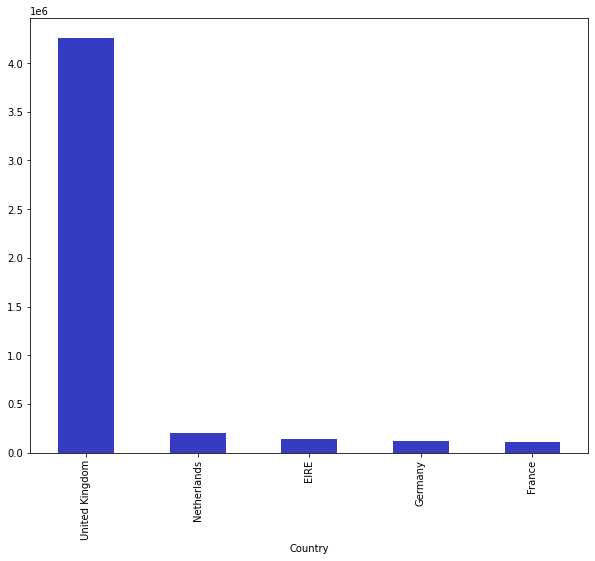

In [ ]:
# Top 5 Companies with high number of purchase
plt.figure(figsize=(10,8))
country_price[:5].plot(kind = 'bar',color='#363CC2')

<Figure size 720x576 with 0 Axes>

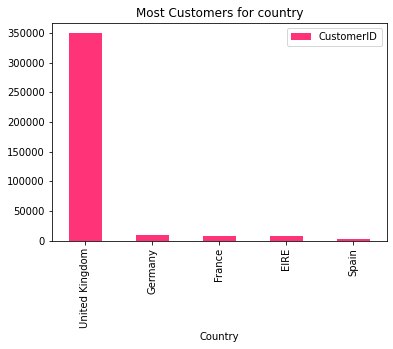

In [ ]:
#Countries with more number of customers
cus_id = pd.DataFrame(df.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
plt.figure(figsize=(10,8))
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country',color='#ff3377')

**UK has highest number of customers**

In [ ]:
# adding a column to the dataset by mulptiplying quantity and unitprice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


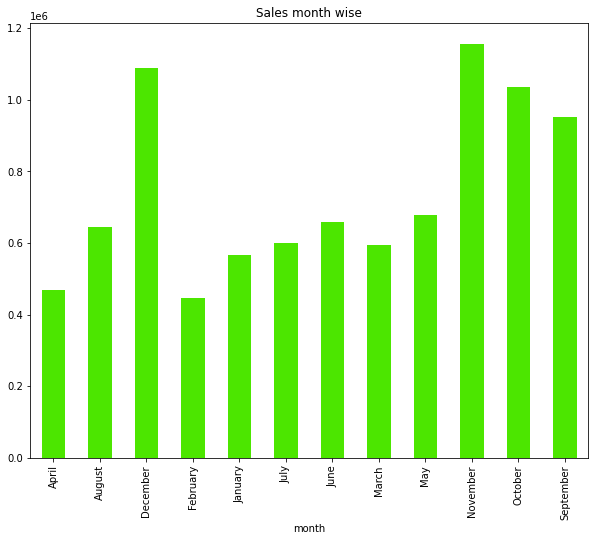

In [ ]:
# Since the data are for a year ,extracting only the month name and ploting the month vs total amount
df['month'] = df['InvoiceDate'].dt.month_name() 
plt.figure(figsize=(10,8))
df.groupby(['month'])['TotalAmount'].sum().plot(kind = 'bar', title = 'Sales month wise',color='#4ce600')

**Maximum sale happened in month of November followed by October and september.**

## **Extract Recency, Frequency, Monetary (RFM) Metrics**

**Efforts have been made to prepare the RFM model. RFM stands for Recency, Frequency, and Monetary_value:**

*   Recency: is a measure of how long it has been since a customer last placed an order with the company.

*   First_purchase: Time in month since the first purchase.

*  Frequency: is a measure of how often a customer orders from the company.   

* Monetary Value: The amount that a customer spends on an average transaction.


In [ ]:
# finding the monetary value
customer_wise_monetary_df = df[['CustomerID', 'TotalAmount']].groupby('CustomerID', as_index = False).sum()
customer_wise_monetary_df.rename(columns = {'TotalAmount' : 'Monetary'}, inplace = True)
customer_wise_monetary_df

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2045.53


In [ ]:
# finding the frequency value
customer_wise_frequent_df =  df[['CustomerID', 'InvoiceNo']].groupby('CustomerID', as_index = False).count()
customer_wise_frequent_df.rename(columns = {'InvoiceNo': 'Frequency'}, inplace = True)
customer_wise_frequent_df

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,721


In [ ]:
# finding the recency value
# finding the last purchase date of the customer
last_purchase_df = df[['CustomerID', 'InvoiceDate']].groupby('CustomerID', as_index = False).max()
last_purchase_df.rename(columns = {'InvoiceDate': 'LastPurchaseDate'}, inplace = True)
last_purchase_df


,CustomerID,LastPurchaseDate
0,12346,2011-01-18 10:01:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
4334,18280,2011-03-07 09:52:00
4335,18281,2011-06-12 10:53:00
4336,18282,2011-12-02 11:43:00
4337,18283,2011-12-06 12:02:00


In [ ]:
# calculating the days_since_last_purchase can be done by substracting last_purchase_date of individual customer from the latest invoice date present in the dataset  

days_since_last_purchase = df['InvoiceDate'].max() - last_purchase_df['LastPurchaseDate'] 
days_since_last_purchase = days_since_last_purchase + pd.Timedelta("1 days")
days_since_last_purchase

0      326 days 02:49:00
1        2 days 20:58:00
2       75 days 23:37:00
3       19 days 02:59:00
4      310 days 20:49:00
              ...       
4334   278 days 02:58:00
4335   181 days 01:57:00
4336     8 days 01:07:00
4337     4 days 00:48:00
4338    43 days 03:21:00
Name: LastPurchaseDate, Length: 4339, dtype: timedelta64[ns]

In [ ]:
# merging the monetary series with frequency series and the dataframe formed is as follows
merged_df = customer_wise_monetary_df.merge(customer_wise_frequent_df, on = "CustomerID", how = "inner")
merged_df


,CustomerID,Monetary,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17
...,...,...,...
4334,18280,180.60,10
4335,18281,80.82,7
4336,18282,178.05,12
4337,18283,2045.53,721


In [ ]:
# considering only the difference in days from the above days_since_last_purchase
time_diff_in_days = pd.Series(data = [d.days for d in days_since_last_purchase], index = merged_df.index)
time_diff_in_days

0       326
1         2
2        75
3        19
4       310
       ... 
4334    278
4335    181
4336      8
4337      4
4338     43
Length: 4339, dtype: int64

In [ ]:
# merging the recency with merged df
merged_df['Recency'] = time_diff_in_days
merged_df

,CustomerID,Monetary,Frequency,Recency
0,12346,77183.60,1,326
1,12347,4310.00,182,2
2,12348,1797.24,31,75
3,12349,1757.55,73,19
4,12350,334.40,17,310
...,...,...,...,...
4334,18280,180.60,10,278
4335,18281,80.82,7,181
4336,18282,178.05,12,8
4337,18283,2045.53,721,4


In [ ]:
# dropping the customerID from the merged_df
merged_df.dropna(inplace = True)
merged_df.drop(columns = 'CustomerID', inplace = True)

## **RFM -Visualization**

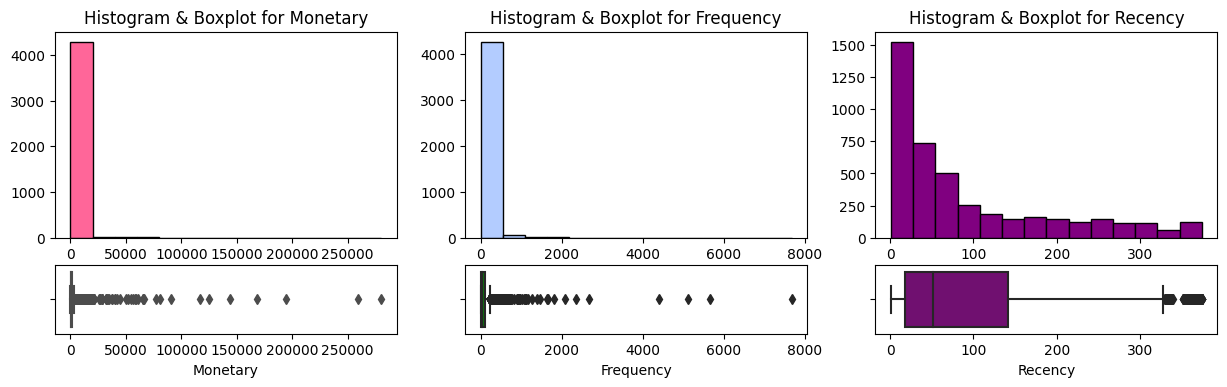

In [ ]:
# 
fig, axis = plt.subplots(nrows = 2, ncols = 3, 
                         figsize = (15, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Monetary
axis[0, 0].hist(merged_df['Monetary'], bins = 'sturges', facecolor = '#ff6699', edgecolor = 'black')
sns.boxplot(x = 'Monetary', data = merged_df,  color = 'red', ax = axis[1, 0])
axis[0, 0].set_title("Histogram & Boxplot for Monetary")

# Frequency
axis[0, 1].hist(merged_df['Frequency'], bins = 'sturges', facecolor = '#b3ccff', edgecolor = 'black')
sns.boxplot(x = 'Frequency', data = merged_df,  color = 'green', ax = axis[1, 1])
axis[0, 1].set_title("Histogram & Boxplot for Frequency")

# Recency
axis[0, 2].hist(merged_df['Recency'], bins = 'sturges', facecolor = '#800080', edgecolor = 'black')
sns.boxplot(x = 'Recency', data = merged_df,  color = 'purple', ax = axis[1, 2])
axis[0, 2].set_title("Histogram & Boxplot for Recency")

plt.show()

**Monetary and Frequency columns contain highly skewed values which indicates possibility of outliers.**

In [ ]:
# Treating outliers using Inter QUartile range method
def treating_outliers(df, col):
  col_q1 = df[col].quantile(0.25)
  col_q3 = df[col].quantile(0.75)
  col_iqr = col_q3 - col_q1
  new_df = df[(df[col] >= col_q1 - 1.5 * col_iqr) & (df[col] <= col_q3 + 1.5 * col_iqr)]
  return new_df

new_df = treating_outliers(merged_df, 'Monetary')
new_df = new_df.reset_index(drop = True)
new_df

,Monetary,Frequency,Recency
0,1797.24,31,75
1,1757.55,73,19
2,334.40,17,310
3,2506.04,85,36
4,89.00,4,204
...,...,...,...
3909,180.60,10,278
3910,80.82,7,181
3911,178.05,12,8
3912,2045.53,721,4


## **Feature Scaling**

**Scaling the RFM features using the standard scaling technique**

In [ ]:
# standardise all parameters
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
stad_new = standard_scaler.fit_transform(new_df)

In [ ]:
stad_new_df = pd.DataFrame(stad_new)
stad_new_df.columns = new_df.columns
stad_new_df

,Monetary,Frequency,Recency
0,1.103611,-0.390975,-0.245052
1,1.055663,0.161481,-0.796234
2,-0.663580,-0.575127,2.067942
3,1.959880,0.319325,-0.628911
4,-0.960036,-0.746126,1.024634
...,...,...,...
3909,-0.849378,-0.667203,1.752981
3910,-0.969918,-0.706665,0.798256
3911,-0.852459,-0.640896,-0.904502
3912,1.403559,8.685090,-0.943872


**Mean and standard deviation of values in the RFM features after scaling are 0 and 1 respectively.**

# **Cluster Tendency**

Cluster Tendency
Measuring the cluster tendency of the RFM features using the Hopkins Statistics method.

If the value is between  0.01,…,0.3 , the data is regularly spaced.

If the value is around  0.5 , it is random.

If the value is between  0.7,…,0.99 , it has a high tendency to cluster.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nearnb = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    clunb = []
    tlunb = []
    for j in range(0, m):
        u_dist, _ = nearnb.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        clunb.append(u_dist[0][1])
        w_dist, _ = nearnb.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        tlunb.append(w_dist[0][1])
 
    H = sum(clunb) / (sum(clunb) + sum(tlunb))
    if isnan(H):
        print(clunb, tlunb)
        H = 0
 
    return H

hopkins(stad_new_df)

0.9552422585802581

**The Hopkins Statistics value is between 0.7 and 0.99. Hence, there is a higher tendency of RFM features towards clustering.**

## **Building KMeans Clustering Model**

Randomly choosing 6 clusters.
Initialising centriods with k-means++ approach.

In [ ]:
# K Means with K = 6: chosen randomly.
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 6, init = 'k-means++', random_state = 14)
kmeans_model.fit(stad_new_df)

cluster_labels = pd.Series(data = kmeans_model.labels_, index = stad_new_df.index)
cluster_labels.value_counts()

2    1347
1     844
5     632
0     583
4     391
3     117
dtype: int64

In [ ]:
# analysis of clusters formed
kmc_df = pd.concat([new_df, cluster_labels], axis = 1)
kmc_df.columns = list(new_df.columns) + ['ClusterLabel']
kmc_df

,Monetary,Frequency,Recency,ClusterLabel
0,1797.24,31,75,1
1,1757.55,73,19,1
2,334.40,17,310,0
3,2506.04,85,36,4
4,89.00,4,204,5
...,...,...,...,...
3909,180.60,10,278,0
3910,80.82,7,181,5
3911,178.05,12,8,2
3912,2045.53,721,4,3


In [ ]:
import plotly.express as px
plotly_fig = px.scatter_3d(kmc_df, x = 'Monetary', y = 'Frequency', z = 'Recency', color = 'ClusterLabel')
plotly_fig.show()

## **Evaluation of the mode**

silhouette score=p−q/max(p,q)
 
p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

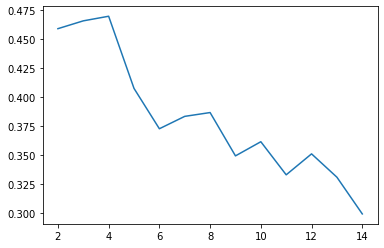

In [ ]:
from sklearn.metrics import silhouette_score
eval_ss = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k).fit(stad_new_df)
    eval_ss.append([k, silhouette_score(stad_new_df, kmeans.labels_)])
    
plt.plot(pd.DataFrame(eval_ss)[0], pd.DataFrame(eval_ss)[1])

**As the number of clusters increase, the similarity of points within a cluster decrease. Hence, Ideally we should chose 4 clusters to be formed.**

In [ ]:
# Rebuilding KMeans model with 4 clusters.
kmeans_model2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 14)
kmeans_model2.fit(stad_new_df)

cluster_labels2 = pd.Series(data = kmeans_model2.labels_, index = stad_new_df.index)
cluster_labels2.value_counts()

1    2049
0     986
2     757
3     122
dtype: int64

In [ ]:
# analysis of clusters formed
km_df2 = pd.concat([new_df, cluster_labels2], axis = 1)
km_df2.columns = list(new_df.columns) + ['ClusterLabel']
km_df2

,Monetary,Frequency,Recency,ClusterLabel
0,1797.24,31,75,2
1,1757.55,73,19,2
2,334.40,17,310,0
3,2506.04,85,36,2
4,89.00,4,204,0
...,...,...,...,...
3909,180.60,10,278,0
3910,80.82,7,181,0
3911,178.05,12,8,1
3912,2045.53,721,4,3


In [ ]:
import plotly.express as px
plotly_fig2 = px.scatter_3d(km_df2, x = 'Monetary', y = 'Frequency', z = 'Recency', color = 'ClusterLabel')
plotly_fig2.show()